In [ ]:
import os
%pwd

In [ ]:
os.chdir('../')
%pwd

1/1 [==============================] - 0s 448ms/step


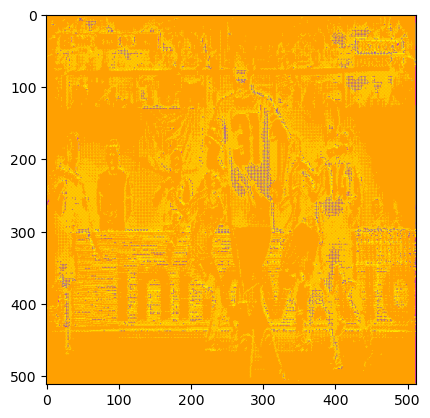

In [3]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

model = load_model(os.path.join("artifacts", "segmentation_model", "base_model.h5"))

test_image = image.load_img(os.path.join("artifacts", "data_ingestion", "images", "Test_original", "Frame 13.jpg"),
                            target_size=(512, 512))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

def convert_to_rgb(predictions):
    # Select the class with the highest probability for each pixel
    predicted_labels = np.argmax(predictions, axis=-1)

    # Define a reverse color map for each class
    colors = [
        [255, 235, 0],    # Class 0: Yellow
        [0, 0, 0],        # Class 1: Black
        [27, 71, 151],    # Class 2: Dark Blue
        [111, 48, 253],   # Class 3: Purple
        [137, 126, 126],  # Class 4: Gray
        [201, 19, 223],   # Class 5: Magenta
        [254, 233, 3],    # Class 6: Yellowish
        [255, 0, 29],     # Class 7: Red
        [255, 159, 0],    # Class 8: Orange
        [255, 160, 1]     # Class 9: Orangeish
    ]

    rgb_images = []
    for i in range(predicted_labels.shape[0]):
        rgb_image = np.zeros((predicted_labels.shape[1], predicted_labels.shape[2], 3), dtype=np.uint8)
        
        for class_idx, color in enumerate(colors):
            mask = (predicted_labels[i] == class_idx)
            rgb_image[mask] = color
            
        rgb_images.append(rgb_image)
    rgb_images = np.array(rgb_images)

    return rgb_images

new = convert_to_rgb(result)
plt.imshow(new[0])
plt.show()


In [4]:
import cv2

cv2.imshow("window", new[0])
cv2.waitKey()
# cv2.destroyWindow("window")
cv2.destroyAllWindows()

In [5]:
import base64
from io import BytesIO
from PIL import Image

pil_img = Image.fromarray(new[0])

# buff = BytesIO()
# pil_img.save(buff, format="JPEG")

# new_image_string = base64.b64encode(buff.getvalue()).decode("utf-8")

processed_string = base64.b64encode(new[0]).decode("utf-8")

print(processed_string)

/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9bzD9bzD9/6ABbzD9/6ABbzD9/6ABbzD9/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6ABbzD9/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6ABbzD9/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6ABbzD9/6ABbzD9/6ABbzD9bzD9bzD9/6ABbzD9/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB/6AB